# Data Preprocessing for Machine Learning

### Objective:

The main objective of this project is to design and implement a robust data preprocessing system that addresses common challenges such as missing values,outliers, inconsistent formatting, and noise. By performing effective data preprocessing,the project aims to enhance the quality, reliability, and usefulness of the data for machine learning.

### Introduction:

The data used for pre processing is Employee dataset, which consists of 148 rows and 6 columns.The columns include Company, Age, Salary, Place, Country and Gender.

A systematic and comprehensive approach has been employed for data cleaning and preprocessing, utilizing the following steps to ensure its quality and suitability for various predictive modeling tasks.

1.Basic Insights:
  Analyzing the data types, identifying missing values, and obtaining a statistical summary, has helped in developing a comprehensive understanding of the dataset's structure and content.

2.Data cleaning: 
  Duplicate rows have been removed from the dataset,to ensure data integrity.Additionally, outliers have been addressed, as they can significantly impact the performance of predictive models. Missing values in each column are replaced strategically, considering factors such as the data distribution. 

3.Data Analysis:
Basic data analysis has been performed to gain deeper insights into the relationships between different features such as Age, Gender and Salary. 

4.Data encoding:
Data encoding techniques has been employed to facilitate the use of categorical data, by converting them into numerical representations.

5.Feature Scaling:
Finally, feature scaling has been applied on numerical predictor variables to standardize their scales for improved model  performance.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [2]:
#Reading data set into df variable
df = pd.read_csv(r"C:\Entri\Core sessions Machine Learning\Projects\DataPreProcessing\Employee.csv")
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [3]:
#Total number of rows and columns in the dataset
df.shape

(148, 6)

There are 148 rows and 6 columns in the above dataset df.

# Data Exploration

In [4]:
# Identifying datatypes of features within the dataset
df.dtypes

Company     object
Age        float64
Salary     float64
Place       object
Country     object
Gender       int64
dtype: object

In [5]:
# Statistical Summary of the dataset
df.describe(include='all')

,Company,Age,Salary,Place,Country,Gender
count,140,130.000000,124.000000,134,148,148.000000
unique,6,NaN,NaN,11,1,NaN
top,TCS,NaN,NaN,Mumbai,India,NaN
freq,53,NaN,NaN,37,148,NaN
mean,NaN,30.484615,5312.467742,NaN,NaN,0.222973
std,NaN,11.096640,2573.764683,NaN,NaN,0.417654
min,NaN,0.000000,1089.000000,NaN,NaN,0.000000
25%,NaN,22.000000,3030.000000,NaN,NaN,0.000000
50%,NaN,32.500000,5000.000000,NaN,NaN,0.000000
75%,NaN,37.750000,8000.000000,NaN,NaN,0.000000


In [6]:
# Insights on structure of dataframe - null or missing values in each feature and datatypes of the features.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [7]:
# Identifying unique values in each feature and finding its length
for column in df.columns:
    print('\033[1m',column,'\033[0m')
    print("Unique Values:",df[column].unique())
    print("Length:",df[column].nunique(),"\n")

 Company 
Unique Values: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Length: 6 

 Age 
Unique Values: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Length: 29 

 Salary 
Unique Values: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Length: 40 

 Place 
Unique Values: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Length: 11 

 Country 
Unique Values: ['India']
Length: 1 

 Gender 
Unique Values: [0 1]
Length: 2 



# Data Cleaning

### Removing duplicate rows in the dataset

In [8]:
#Identifying duplicate rows
df[df.duplicated()]

,Company,Age,Salary,Place,Country,Gender
84,CTS,43.0,NaN,Mumbai,India,0
130,TCS,21.0,4824.0,Mumbai,India,0
131,Infosys,NaN,5835.0,Mumbai,India,0
144,Infosys,22.0,8787.0,Calcutta,India,1


In [10]:
#Removing duplicate rows
df=df.drop_duplicates()

#checking for duplicate rows
print(df.shape)
df[df.duplicated()]

(144, 6)


,Company,Age,Salary,Place,Country,Gender


After removing duplicate rows there are now 144 rows in the dataset

#### Replacing value 0 in Age column with Nan

In [11]:
df['Age'].replace(0, np.nan, inplace=True)

### Identifying and replacing column wise missing values 

In [19]:
#column wise count of missing values
df.isnull().sum()

Company     8
Age        23
Salary     23
Place      14
Country     0
Gender      0
dtype: int64

The above summary shows the no. of missing values in each column.Null values are found in Company,Age,Salary and Place columns.

#### Categorical and numerical data in the dataset 

In [13]:
print("Categorical columns are:",df.select_dtypes(include=['object']).columns)
print("Numerical columns are:",df.select_dtypes(exclude=['object']).columns)

Categorical columns are: Index(['Company', 'Place', 'Country'], dtype='object')
Numerical columns are: Index(['Age', 'Salary', 'Gender'], dtype='object')


### Replacing missing values in categorical Company, Place columns with most frequent value.

In [15]:
# Finding most frequent value of 'Company' column
df['Company'].value_counts()

Company
TCS                          52
Infosys                      43
CTS                          35
Tata Consultancy Services     2
Congnizant                    2
Infosys Pvt Lmt               2
Name: count, dtype: int64

In [17]:
df['Company'].value_counts().idxmax()

'TCS'

Maximum number of Employees are employed at TCS 

In [20]:
#Replacing missing values in Company column with most frequent value
df["Company"].replace(np.nan, "TCS", inplace=True)

In [21]:
# Finding most frequent value of 'Place' column
df['Place'].value_counts()

Place
Mumbai        34
Calcutta      32
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64

In [23]:
df['Place'].value_counts().idxmax()

'Mumbai'

Maximum number of Employees are from Mumbai.

In [24]:
#Replacing missing values in Place column with most frequent value
df["Place"].replace(np.nan, "Mumbai", inplace=True)

In [25]:
nan_counts = df['Company'].isna().value_counts()
print(nan_counts)

Company
False    144
Name: count, dtype: int64


In [26]:
nan_counts = df['Place'].isna().value_counts()
print(nan_counts)

Place
False    144
Name: count, dtype: int64


### Detecting and removing Outliers in Numerical Columns: Age, Salary

#### Box plot of Age of Employees

Text(0.5, 1.0, 'Age Distribution of Employees')

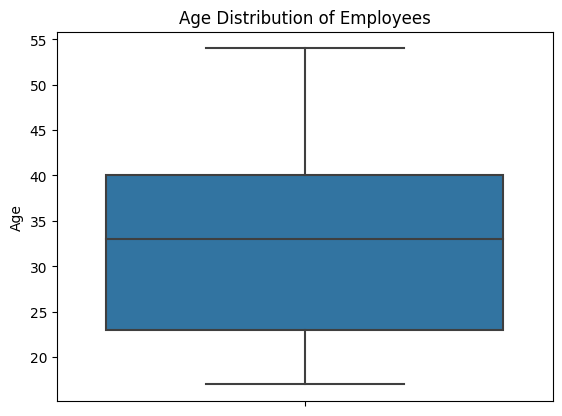

In [27]:
sns.boxplot(data=df, y='Age')
plt.title("Age Distribution of Employees")

#### Detecting outliers in 'Age' using IQR method

In [28]:
column = 'Age'

#Lower and upper quartiles
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)


#IQR (Interquartile Range)
IQR = Q3 - Q1

#lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound=",lower_bound,"\nUpper Bound=",upper_bound)

# Detecting outliers based on the bounds
print("Outliers detected using IQR Method:")
outlier=df[(df[column] < lower_bound) | (df[column] > upper_bound)]
if outlier.empty:
    print("There are no outliers")
else:
    print(outlier)

Lower Bound= -2.5 
Upper Bound= 65.5
Outliers detected using IQR Method:
There are no outliers


From above box plot of Age Distribution of Employees and IQR method outliers could not be detected in the Age column. 

#### Box plot of Salary of Employees

Text(0.5, 1.0, 'Salary Distribution of Employees')

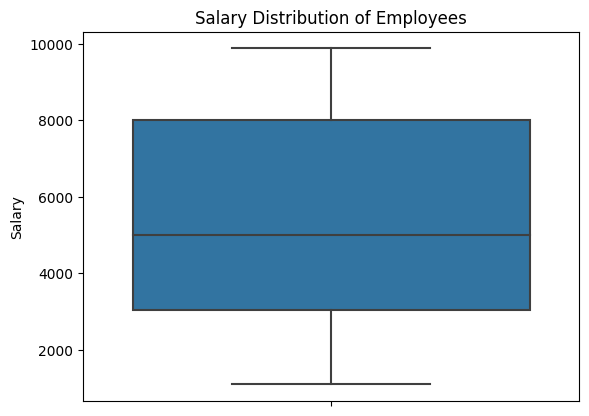

In [29]:
sns.boxplot(data=df, y='Salary')
plt.title("Salary Distribution of Employees")

#### Detecting outliers in 'Salary' using IQR method

In [30]:
column = 'Salary'

#Lower and upper quartiles
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)


#IQR (Interquartile Range)
IQR = Q3 - Q1

#lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound=",lower_bound,"\nUpper Bound=",upper_bound)

# Detecting outliers based on the bounds
print("Outliers detected using IQR Method:")
outlier=df[(df[column] < lower_bound) | (df[column] > upper_bound)]
if outlier.empty:
    print("There are no outliers")
else:
    print(outlier)

Lower Bound= -4425.0 
Upper Bound= 15455.0
Outliers detected using IQR Method:
There are no outliers


From above box plot of Age Distribution of Employees and IQR method outliers could not be detected in the Salary column.

### Replacing missing values in numerical Age,Salary columns with mean value.

In [31]:
#Calculate average of Age column
mean_age = df['Age'].mean()
print("Average of Age:",mean_age)

Average of Age: 32.04132231404959


In [32]:
#Replace NaN values with Average Age
df["Age"].replace(np.nan, mean_age,inplace = True)

In [33]:
#Calculate average of Salary column
mean_salary = df['Salary'].mean()
print("Average of Salary:",mean_salary)

Average of Salary: 5283.471074380165


In [34]:
#Replace NaN values with Average Salary
df["Salary"].replace(np.nan, mean_salary,inplace = True)

In [35]:
# Structure of dataframe after removal od duplicate rows and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  144 non-null    object 
 1   Age      144 non-null    float64
 2   Salary   144 non-null    float64
 3   Place    144 non-null    object 
 4   Country  144 non-null    object 
 5   Gender   144 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.9+ KB


# Data Analysis

### Correlation between Age and Salary

Correlation between Age and Salary is: -0.020298721732134636


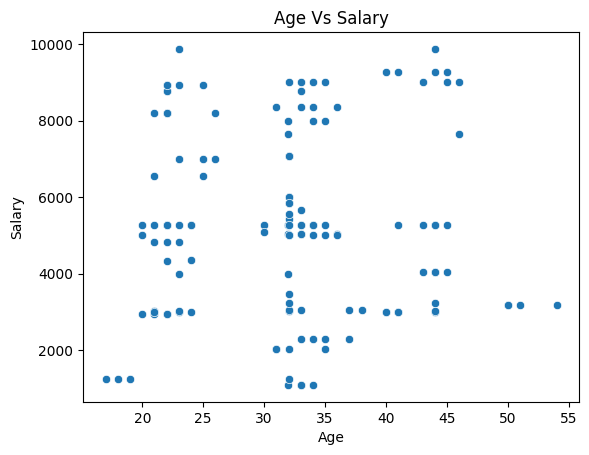

In [36]:
#Scatter plot of Age and Salary
sns.scatterplot(data=df, x='Age', y='Salary')
plt.title('Age Vs Salary')

#Calculating correlation between Age and Salary
correlation = df['Age'].corr(df['Salary'])
print("Correlation between Age and Salary is:",correlation)

From the Scatter Plot and correlation calculated above, it can be concluded that there is no correlation between Age and Salary variables.

### Employees with age >40 and salary<5000

In [37]:
filtered_data = df[(df['Age'] > 40) & (df['Salary'] < 5000)]
filtered_data

,Company,Age,Salary,Place,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


### Place wise count of employees

In [38]:
#count of employees from each place
location_count = pd.DataFrame(df['Place'].value_counts())
location_count.reset_index(inplace=True)
location_count.columns = ['Place', 'Count']

# Sorting the DataFrame by the 'Place' column in alphabetical order
location_count.sort_values(by='Place', inplace=True)
location_count.reset_index(drop=True, inplace=True)

print("Place wise count of employees")
location_count

Place wise count of employees


,Place,Count
0,Bhopal,1
1,Calcutta,32
2,Chennai,14
3,Cochin,13
4,Delhi,14
5,Hyderabad,8
6,Mumbai,48
7,Nagpur,1
8,Noida,8
9,Podicherry,3


#### Bar Plot of Place

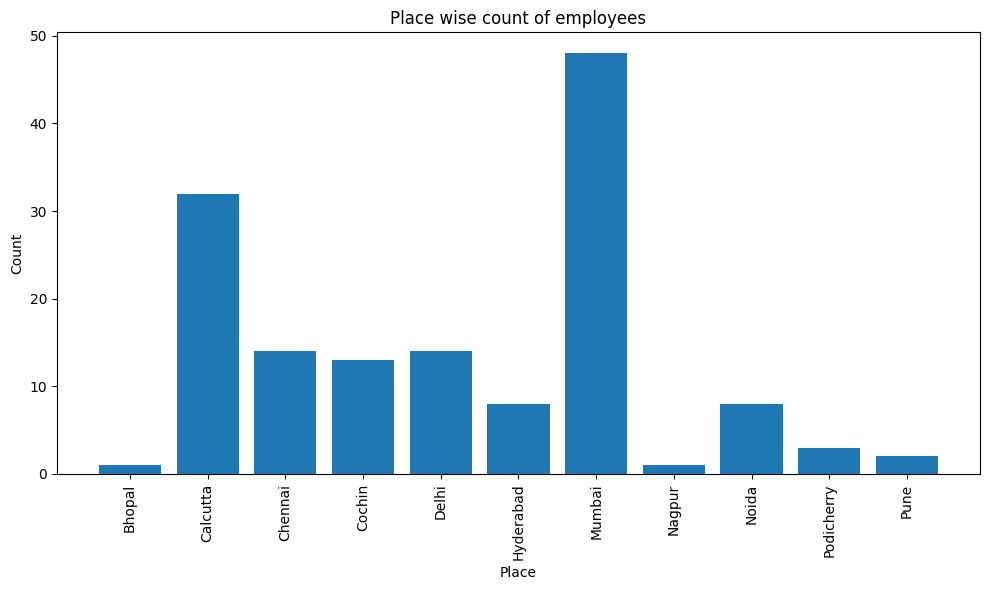

In [39]:
plt.figure(figsize=(10, 6))
plt.bar(location_count['Place'], location_count['Count'])
plt.xlabel('Place')
plt.ylabel('Count')
plt.title('Place wise count of employees')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

### Gender- countplot

Gender Count:
 Gender
0    112
1     32
Name: count, dtype: int64


Text(0.5, 1.0, 'Gender Countplot')

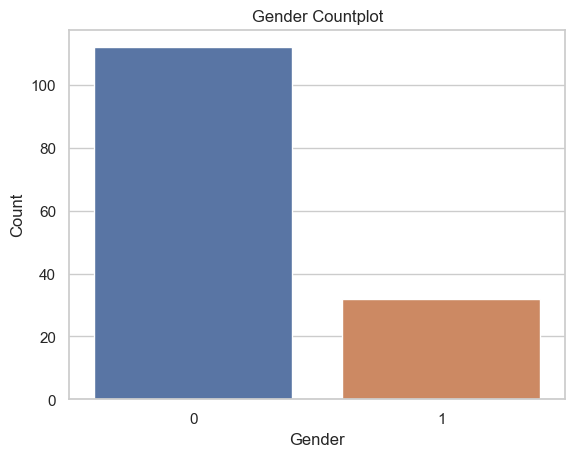

In [55]:
print("Gender Count:\n",df['Gender'].value_counts())
sns.set(style="whitegrid")
sns.countplot(x='Gender', data=df)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Countplot")

In the above countplot, '0' is assumed as Female and '1' as Male. Based on this assumption and from above countplot and count table values, there are more number of females in the data than males.

### Gender wise Salary Distribution

Text(0.5, 1.0, 'Gender vs. Salary')

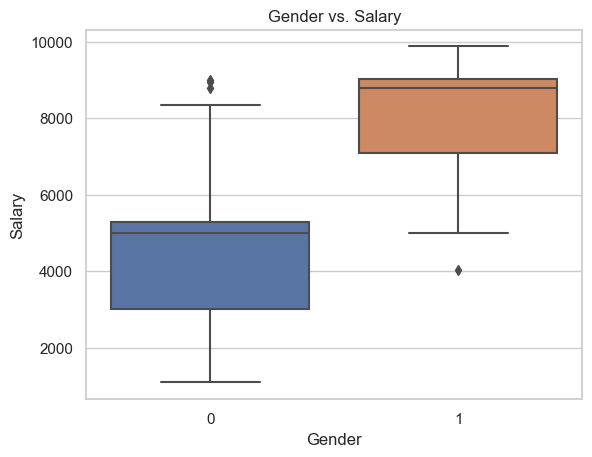

In [58]:
sns.set(style="whitegrid")
sns.boxplot(x='Gender', y='Salary', data=df)
plt.xlabel("Gender")
plt.ylabel("Salary")
plt.title("Gender vs. Salary")

From the boxplot on Gender Vs Salary, males earn higher salary than females.( '0' is assumed as Female and '1' as Male)

# Data Encoding

In [40]:
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5283.471074,Chennai,India,0
1,Infosys,30.0,5283.471074,Mumbai,India,0
2,TCS,35.0,2300.000000,Calcutta,India,0
3,Infosys,40.0,3000.000000,Delhi,India,0
4,TCS,23.0,4000.000000,Mumbai,India,0


### One-Hot Encoding on 'Company' and 'Place' Columns

In [41]:
#Applying One-Hot-Encoding on 'Company' column
company_dummy = pd.get_dummies(df['Company']).astype(int)
company_dummy.head()

,CTS,Congnizant,Infosys,Infosys Pvt Lmt,TCS,Tata Consultancy Services
0,0,0,0,0,1,0
1,0,0,1,0,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,0,0,1,0


In [42]:
#Applying One-Hot-Encoding on 'Place' column
place_dummy = pd.get_dummies(df['Place']).astype(int)
place_dummy.head()

,Bhopal,Calcutta,Chennai,Cochin,Delhi,Hyderabad,Mumbai,Nagpur,Noida,Podicherry,Pune
0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0


In [44]:
# Concatenating the original dataframe df and encoded company_dummy and place_dummy to a new dataframe df1.
df1 = pd.concat([df,company_dummy,place_dummy],axis=1)
df1.head()

,Company,Age,Salary,Place,Country,Gender,CTS,Congnizant,Infosys,Infosys Pvt Lmt,...,Calcutta,Chennai,Cochin,Delhi,Hyderabad,Mumbai,Nagpur,Noida,Podicherry,Pune
0,TCS,20.0,5283.471074,Chennai,India,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,Infosys,30.0,5283.471074,Mumbai,India,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,TCS,35.0,2300.000000,Calcutta,India,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Infosys,40.0,3000.000000,Delhi,India,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,TCS,23.0,4000.000000,Mumbai,India,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [46]:
#Dropping Company and Place columns
df1.drop(['Company','Place'],axis=1,inplace=True)

In [47]:
df1.columns

Index(['Age', 'Salary', 'Country', 'Gender', 'CTS', 'Congnizant', 'Infosys',
       'Infosys Pvt Lmt', 'TCS', 'Tata Consultancy Services', 'Bhopal',
       'Calcutta', 'Chennai', 'Cochin', 'Delhi', 'Hyderabad', 'Mumbai',
       'Nagpur', 'Noida', 'Podicherry', 'Pune'],
      dtype='object')

In [48]:
df1.head()

,Age,Salary,Country,Gender,CTS,Congnizant,Infosys,Infosys Pvt Lmt,TCS,Tata Consultancy Services,...,Calcutta,Chennai,Cochin,Delhi,Hyderabad,Mumbai,Nagpur,Noida,Podicherry,Pune
0,20.0,5283.471074,India,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,30.0,5283.471074,India,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,35.0,2300.000000,India,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,40.0,3000.000000,India,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,23.0,4000.000000,India,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


### Label Encoding on 'Country' Column

In [49]:
#Applying Label Encoding on Country Column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Country']=le.fit_transform(df1['Country'])
df1.head()

,Age,Salary,Country,Gender,CTS,Congnizant,Infosys,Infosys Pvt Lmt,TCS,Tata Consultancy Services,...,Calcutta,Chennai,Cochin,Delhi,Hyderabad,Mumbai,Nagpur,Noida,Podicherry,Pune
0,20.0,5283.471074,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,30.0,5283.471074,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,35.0,2300.000000,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,40.0,3000.000000,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,23.0,4000.000000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


# Train Test Split of Dataset

In [134]:
df1.head()

,Age,Salary,Country,Gender,CTS,Congnizant,Infosys,Infosys Pvt Lmt,TCS,Tata Consultancy Services,...,Calcutta,Chennai,Cochin,Delhi,Hyderabad,Mumbai,Nagpur,Noida,Podicherry,Pune
0,20.0,5283.471074,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,30.0,5283.471074,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,35.0,2300.000000,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,40.0,3000.000000,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,23.0,4000.000000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [135]:
df1.columns

Index(['Age', 'Salary', 'Country', 'Gender', 'CTS', 'Congnizant', 'Infosys',
       'Infosys Pvt Lmt', 'TCS', 'Tata Consultancy Services', 'Bhopal',
       'Calcutta', 'Chennai', 'Cochin', 'Delhi', 'Hyderabad', 'Mumbai',
       'Nagpur', 'Noida', 'Podicherry', 'Pune'],
      dtype='object')

#### Dividing into Target and Predictor Variables

In [136]:
X = df1[['Age','Country', 'Gender', 'CTS', 'Congnizant', 'Infosys',
       'Infosys Pvt Lmt', 'TCS', 'Tata Consultancy Services', 'Bhopal',
       'Calcutta', 'Chennai', 'Cochin', 'Delhi', 'Hyderabad', 'Mumbai',
       'Nagpur', 'Noida', 'Podicherry', 'Pune']]
y=df1[['Salary']]
X

,Age,Country,Gender,CTS,Congnizant,Infosys,Infosys Pvt Lmt,TCS,Tata Consultancy Services,Bhopal,Calcutta,Chennai,Cochin,Delhi,Hyderabad,Mumbai,Nagpur,Noida,Podicherry,Pune
0,20.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,30.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,35.0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,40.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,23.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,22.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
143,33.0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
145,44.0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
146,33.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [137]:
y

,Salary
0,5283.471074
1,5283.471074
2,2300.000000
3,3000.000000
4,4000.000000
...,...
142,8202.000000
143,9024.000000
145,4034.000000
146,5034.000000


We have assigned the set of all preditor variables to X and our target variable 'Salary' to variable y.

#### Creating a train test split of the data using predictor and target variables

In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [139]:
X_train

,Age,Country,Gender,CTS,Congnizant,Infosys,Infosys Pvt Lmt,TCS,Tata Consultancy Services,Bhopal,Calcutta,Chennai,Cochin,Delhi,Hyderabad,Mumbai,Nagpur,Noida,Podicherry,Pune
125,33.000000,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
31,20.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
99,44.000000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
36,32.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
16,23.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,34.000000,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
107,32.041322,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
14,40.000000,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
93,54.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [140]:
X_test

,Age,Country,Gender,CTS,Congnizant,Infosys,Infosys Pvt Lmt,TCS,Tata Consultancy Services,Bhopal,Calcutta,Chennai,Cochin,Delhi,Hyderabad,Mumbai,Nagpur,Noida,Podicherry,Pune
118,22.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
19,32.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
82,22.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
98,33.000000,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
56,38.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
12,45.000000,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
135,40.000000,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
65,31.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
66,41.000000,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
18,22.000000,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [141]:
y_train

,Salary
125,5654.000000
31,2934.000000
99,9284.000000
36,5283.471074
16,3030.000000
...,...
71,9024.000000
107,9024.000000
14,3000.000000
93,3184.000000


In [142]:
y_test

,Salary
118,5283.471074
19,5283.471074
82,5283.471074
98,8345.000000
56,3045.000000
12,5283.471074
135,9284.000000
65,2034.000000
66,5283.471074
18,5283.471074


# Feature Scaling

### Feature Scaling using Standard Scaler on 'Age' column

In [143]:
X_train.head()

,Age,Country,Gender,CTS,Congnizant,Infosys,Infosys Pvt Lmt,TCS,Tata Consultancy Services,Bhopal,Calcutta,Chennai,Cochin,Delhi,Hyderabad,Mumbai,Nagpur,Noida,Podicherry,Pune
125,33.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
31,20.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
99,44.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
36,32.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
16,23.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [145]:
from sklearn.preprocessing import StandardScaler

# Creating a scaler object
sc = StandardScaler()
X_train1=X_train
X_test1=X_test

In [146]:
X_train1['Age'] = sc.fit_transform(X_train1[['Age']])
X_test1['Age'] = sc.transform(X_test1[['Age']])

In [147]:
X_train1[['Age']]

,Age
125,0.143029
31,-1.414380
99,1.460837
36,0.023228
16,-1.054978
...,...
71,0.262830
107,0.028179
14,0.981634
93,2.658844


In [148]:
X_test1[['Age']]

,Age
118,-1.174779
19,0.023228
82,-1.174779
98,0.143029
56,0.742032
12,1.580637
135,0.981634
65,-0.096572
66,1.101435
18,-1.174779


Using Standard Scaler we have scaled values of the 'Age' feature to have a standardized mean and standard deviation across 
the entire dataset.It is beneficial, while using machine learning algorithms, to make the features comparable.

### Feature Scaling using Min Max Scaler on 'Age' column

In [149]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = X_train
X_test_scaled = X_test
X_train_scaled['Age'] = scaler.fit_transform(X_train_scaled[['Age']])
X_test_scaled['Age'] = scaler.transform(X_test[['Age']])

In [151]:
X_train_scaled[['Age']]

,Age
125,0.432432
31,0.081081
99,0.729730
36,0.405405
16,0.162162
...,...
71,0.459459
107,0.406522
14,0.621622
93,1.000000


In [152]:
X_test[['Age']]

,Age
118,0.135135
19,0.405405
82,0.135135
98,0.432432
56,0.567568
12,0.756757
135,0.621622
65,0.378378
66,0.648649
18,0.135135


Using Min-max scaling all the values in the Age feature are mapped within the range [0,1].